# **Classify reviews by training an LLM**

This code classify reviews into different classes
This is done following several steps



1.   Read the file that contains the reviews that have been labelled manually. This is a csv file 
2. Get some statistics on the data
3. This code is highly inspired of the code in **Natural Language Processing with Transformers**

# **How to use the code**
The code was run on google colab, each file used must be put in one's peronal google drive.

As of today, google colab can only access to the drive of the person that is running the code, hence by mounting google colab on the drive, only the current user's drive is visible to colab

Therefore, for executing the code, the folder containing the code should be put directly in one's drive.

# **Prerequisites**

In [ ]:
# First install the necessary libraries; keep ! if you are on GPU in colab
!pip install -q transformers datasets

**Importing libraries**

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

**Mounting the drive**

In [ ]:
# mounting the drive
drive.mount('/content/drive')

Mounted at /content/drive


**Defining the names**

In [ ]:
# specifying the working directory
main_Folder="/content/drive/My Drive/Review_analysis/"
data_Folder = main_Folder+'data/'
# folder of training
csv_data=data_Folder+'reviews_carrefour.csv' 

# **Reading the csv**
- First the data with their labels

In [ ]:
df_data = pd.read_csv (csv_data)

In [ ]:
print("Number of labelled reviews is ",df_data.shape[0])

Number of labelled reviews is  276


In [ ]:
print("The fourth column are the reviews text whilst the last four columns are the labels (categories) of the reviews. Note that one review can belong to several categories")
df_data= df_data.rename(columns={'clean_BE': 'Buying Experience', 'clean_PD': 'Product', 'clean_DM': 'Delivery Mode', 
                                 'clean_AS': 'Customer Service', 'Product': 'Product super_class', 'Buying experience': 'Buying experience super_class',
                                 'Delivery Mode':  'Delivery Mode super_class','After Sales': 'After Sales super_class'})  

The fourth column are the reviews text whilst the last four columns are the labels (categories) of the reviews. Note that one review can belong to several categories


In [ ]:
categories = list(df_data.columns.values[-4:])
print('The categories of reviews are:', categories)
# uncomment if you want to see some data
#df_data.head()

The categories of reviews are: ['Buying Experience', 'Product', 'Delivery Mode', 'Customer Service']


In [ ]:
#Uncomment if you want to see
#df_data

**Number of reviews for each category**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


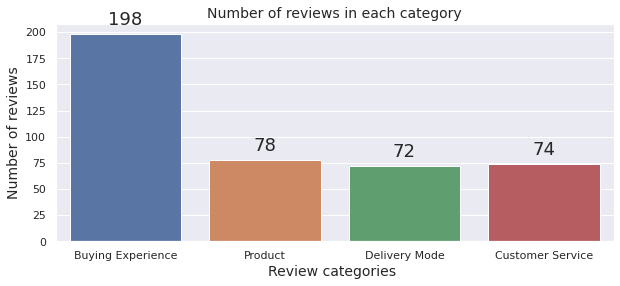

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,4))
ax= sns.barplot(categories, df_data.iloc[:,-4:].sum().values)
plt.title("Number of reviews in each category", fontsize=14)
plt.ylabel('Number of reviews', fontsize=14)
plt.xlabel('Review categories ', fontsize=14)
#adding the text labels
rects = ax.patches
labels = df_data.iloc[:,-4:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

**Reviews having multiple labels (belonging to multiple categories)**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


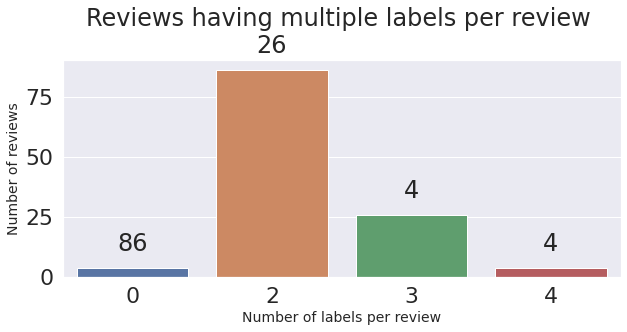

In [ ]:
rowSums = df_data.iloc[:,-4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(10,4))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Reviews having multiple labels per review \n")
plt.ylabel('Number of reviews', fontsize=14)
plt.xlabel('Number of labels per review', fontsize=14)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

**WordCloud representation of most used words in each category of reviews and each ranking**
- We have starts going from 1 to 5
- We divide them into Positive: 1 and 2, Neutral: 3, Positive: 4 and 5
- We display the word cloud for the four categores and the 3 sentiments
- This results in 12 word clouds
  - Positive with 4 labels
  - Neutral with 4 labels
  - Negative with 4 labels

In [ ]:
# First prepare the texts for each of the 12 analyses we want to make
Positve_BuyingExperience = ""
Positve_Product = ""
Positive_DeliveryMode = ""
Positive_CustomerService = ""

Negative_BuyingExperience = ""
Negative_Product = ""
Negative_DeliveryMode = ""
Negative_CustomerService = ""

Neutral_BuyingExperience = ""
Neutral_Product = ""
Neutral_DeliveryMode = ""
Neutral_CustomerService = ""

In [ ]:
# Then, concatenante the texts of each of the categories and rankings (sentiments)
for i in range (len(df_data)):
  if (pd.isnull(df_data["reviews"].iloc[i]))==False:

    if (df_data["ratings"].iloc[i]<3):

      if df_data["Buying Experience"].iloc[i]==1:
        Negative_BuyingExperience += df_data["reviews"].iloc[i]
      if df_data["Product"].iloc[i]==1:
        Negative_Product += df_data["reviews"].iloc[i]
      if df_data["Delivery Mode"].iloc[i]==1:
        Negative_DeliveryMode += df_data["reviews"].iloc[i]
      if df_data["Customer Service"].iloc[i]==1:
        Negative_CustomerService += df_data["reviews"].iloc[i]

    elif df_data["ratings"].iloc[i]>=4:
      if df_data["Buying Experience"].iloc[i]==1:
        Positve_BuyingExperience += df_data["reviews"].iloc[i]
      if df_data["Product"].iloc[i]==1:
        Positve_Product += df_data["reviews"].iloc[i]
      if df_data["Delivery Mode"].iloc[i]==1:
        Positive_DeliveryMode += df_data["reviews"].iloc[i]
      if df_data["Customer Service"].iloc[i]==1:
        Positive_CustomerService += df_data["reviews"].iloc[i]

    else:
      Neutral_BuyingExperience = ""
      if df_data["Buying Experience"].iloc[i]==1:
        Neutral_BuyingExperience += df_data["reviews"].iloc[i]
      if df_data["Product"].iloc[i]==1:
        Neutral_Product += df_data["reviews"].iloc[i]
      if df_data["Delivery Mode"].iloc[i]==1:
        Neutral_DeliveryMode += df_data["reviews"].iloc[i]
      if df_data["Customer Service"].iloc[i]==1:
        Neutral_CustomerService += df_data["reviews"].iloc[i]

**Exemple of most used words in negative reviews for the Customer service**

The analysis can be changed by changing the variable when calling wordCloud

In [ ]:
excluded_words = ['d', 'du', 'de', 'la', 'je','des', 'le', 'et', 'est','c\'est', 'mai','suis', 'elle', 'j\'ai', 
                  'une', 'me', 'ne', 'rien', 'mais','pas','en', 'avec','que', 'aux', 'qui', 'ces', 'les', 'dans', 
                  'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 
                  'se', 's', 'vous', 'au', 'c', 'ils','aussi', 'toutes', 'autre', 'comme']

In [ ]:
excluded_words=[]
with open('stop_words.txt', 'r') as f:
    txt_content = f.read()
    excluded_words = txt_content.split("\n")

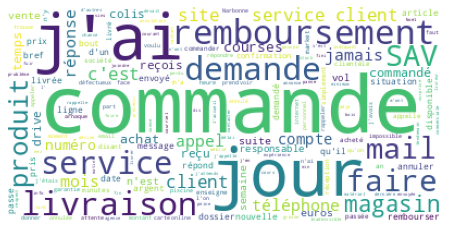

In [ ]:
# can use https://www.ranks.nl/stopwords/french for french stop words
Pos_BE= WordCloud(background_color = 'white', stopwords = excluded_words, max_words = 200).generate(Negative_CustomerService)
plt.figure(figsize=(10,4))
plt.imshow(Pos_BE)
plt.axis("off")
plt.show();

# **Train using hugging face**

In [ ]:
import datasets
import huggingface_hub
import matplotlib.font_manager as font_manager
import torch
import transformers
from IPython.display import set_matplotlib_formats

### **Transform our data frame into a one versus all and save it in a format expected by hugging face**

In this first strategy, we will consider a review as belonging to a category if that category is one.

To do so, we will simply create several classifiers, one for each category. Let us start with the Buying experience category. Hence, we will only take the column of Buying Experience in the dataframe

In [ ]:
l1=[]
l2=[]
l3=[]
for i in range (len(df_data)):
  if (pd.isnull(df_data["reviews"].iloc[i]))==False:
    if df_data["Buying Experience"].iloc[i]==1:
      l1.append(df_data["reviews"].iloc[i])
      l2.append(1)
      l3.append("Buying Experience")
    else:
      l1.append(df_data["reviews"].iloc[i])
      l2.append(0)
      l3.append("Not Buying experience")

In [ ]:
df_review=pd.DataFrame()
df_review["text"]=l1 		
df_review["label"]=l2
#df_review["label_name"]=l3
df_review.head()

,text,label
0,"Nous avons commandé et reçu une tablette, à u...",1
1,impossible de se connecter er de créer un compte,1
2,Mépris total pour le client et arnaque en mass...,0
3,Mon expérience concerne Carrefour traiteur: PL...,0
4,Zero pointé car opération mal conçue. Carref...,1


In [ ]:
print(df_review.shape)

(272, 2)


**Divide into train and test**

In [ ]:
X= df_review["text"]
print('See the first review of our dataset :')
X[0]

See the first review of our dataset :


"Nous avons commandé et reçu une tablette,  à un prix très avantageux, jusque là, après avoir lu les autres avis, nous avons été chanceux. Après quelques utilisations, elle refuse de s'allumer. Nous avons encore eu la chance de réussir à contacter le SAV à l'étranger, bien entendu. Mais le courriel qui devait nous permettre de renvoyer la tablette ne nous est jamais parvenu. Depuis impossible de joindre le SAV, comme les autres, nous  patientons 5 minutes puis on nous annonce que personne ne peut nous répondre. Les courriels ne sont pas plus efficaces : réponse automatique sans suite..."

In [ ]:
X

0      Nous avons commandé et reçu une tablette,  à u...
1       impossible de se connecter er de créer un compte
2      Mépris total pour le client et arnaque en mass...
3      Mon expérience concerne Carrefour traiteur: PL...
4      Zero pointé car opération  mal conçue.  Carref...
                             ...                        
267    Bonjour, j'ai acheté un Iphone 12 dans le maga...
268    Bonjour, \nSuite à mon pb pour commander les c...
269    Dans l'impossibilité de réserver sur le site d...
270    personnellement j'adore carrefour depuis que j...
271    Commande effectuée pour les jouets géants en c...
Name: text, Length: 272, dtype: object

In [ ]:
y =  df_review["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( df_review, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,text,label
229,Carrefour Ecully :\n\n Depuis ces derniers moi...,1
258,J’ai récemment fait mes courses au magasin de ...,1
261,"Sur le point de déménager, je peux finalement ...",0
210,Bonjour. Fidèle cliente du Carrefour Gambetta ...,1
193,"Bonjour Carrefour, Je suis cliente depuis p...",1
...,...,...
188,Carrefour ne fait aucun effort pour les person...,1
71,"Nul archi nul,aucune fibre commerciale,j'ai ac...",1
106,3 JOURS QUE JE TEPHONE POUR LE SERVICE CARTE P...,0
270,personnellement j'adore carrefour depuis que j...,1


In [ ]:
X_train.iloc[0]

text     Carrefour Ecully :\n\n Depuis ces derniers moi...
label                                                    1
Name: 229, dtype: object

# **Transformers as Feature Extractors**

# **Let's head train our data**

In [ ]:
# hide_output
import pandas as pd
import datasets
from datasets import Dataset, DatasetDict

X_train, X_test, y_train, y_test = train_test_split( df_review, y, test_size=0.33, random_state=42)
train = Dataset.from_pandas(X_train)
test = Dataset.from_pandas(X_test)
 
dataset = DatasetDict()
 
dataset['train'] = train
dataset['test'] = test

reviews = dataset.remove_columns(['__index_level_0__'])


In [ ]:
reviews

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 182
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 90
    })
})

In [ ]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
reviews_encoded = reviews.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
reviews_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 182
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 90
    })
})

In [ ]:
reviews_encoded.set_format("torch",
columns=["input_ids", "attention_mask", "label"])

In [ ]:
reviews_encoded["train"].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

After the encoding, we will have a text, a label, the encoded text (tokenized according to a dictionnary) and the attention mask

In [ ]:
len(reviews_encoded['train'][0])

3

In [ ]:
# uncomment is you want to see
#emotions_encoded['train'][0]

In [ ]:
print(tokenize(reviews["train"][:2]))

{'input_ids': [[101, 12385, 12879, 8162, 14925, 18083, 2100, 1024, 2139, 14289, 2483, 8292, 2015, 4315, 14862, 2015, 25175, 2015, 1010, 3802, 6453, 4241, 3298, 22959, 2102, 3393, 1015, 2121, 21551, 21864, 27885, 3669, 3351, 4886, 2102, 1037, 16655, 25158, 6263, 10364, 3474, 3802, 21864, 2566, 21351, 2102, 6819, 2618, 7367, 2015, 11265, 12881, 2015, 1010, 4372, 8292, 21864, 5142, 2063, 3393, 23848, 21369, 2078, 1010, 24110, 2094, 2006, 24188, 5403, 4078, 4013, 8566, 12762, 2158, 16211, 7666, 2006, 21877, 4904, 27885, 6528, 4313, 4078, 14916, 20240, 10177, 8163, 29536, 4313, 4895, 21877, 2226, 1040, 1005, 14895, 8740, 28994, 2139, 3056, 2015, 24501, 26029, 19150, 2015, 21864, 7868, 3372, 9530, 11020, 9013, 23402, 8557, 3672, 3393, 3126, 11937, 5403, 1025, 24110, 2094, 16655, 3094, 2063, 1037, 3802, 2063, 4962, 2063, 11968, 3393, 1015, 2121, 21551, 11968, 4654, 6633, 10814, 3802, 10861, 3393, 4013, 8566, 4183, 9765, 2717, 2063, 1000, 15068, 16558, 2666, 1000, 1024, 5157, 2063, 26208, 2618

In [ ]:
len(tokenize(reviews["train"][:2]))

2

Using pretrained model to extract the features

In [ ]:
from transformers import AutoModel

#model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
is_gpu_available = torch.cuda.is_available()
is_gpu_available

True

In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
#hide_output
import time

start_time = time.time()

reviews_hidden = reviews_encoded.map(extract_hidden_states, batched=True)


#batch = tokenizer.prepare_seq2seq_batch(src_text, truncation=True, padding='longest', return_tensors='pt').to(torch_device)

print(round(time.time() - start_time), "seconds")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

9 seconds


In [ ]:
reviews_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Creating a feature matrix

In [ ]:
import numpy as np

X_train = np.array(reviews_hidden["train"]["hidden_state"])
X_valid = np.array(reviews_hidden["test"]["hidden_state"])
y_train = np.array(reviews_hidden["train"]["label"])
y_valid = np.array(reviews_hidden["test"]["label"])
X_train.shape, X_valid.shape

((182, 768), (90, 768))

In [ ]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

print(round(time.time() - start_time), "seconds")

0 seconds


In [ ]:
print(lr_clf.score(X_valid, y_valid))

0.6555555555555556

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.7111111111111111

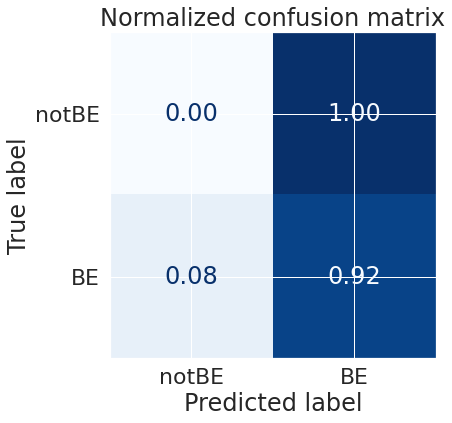

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
labels = {'BE', 'notBE'}
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## **Second, let's Fine tune (Train the body of) our data**

In [ ]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'classifier

#### Defining the performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#### Training the model
Login to hugging face

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(reviews_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-reviews"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True, 
                                  log_level="error")

Before running this code, one needs to create a new model in:

https://huggingface.co/new

With the name specified in model_name

In [ ]:
from transformers import Trainer

start_time = time.time()

trainer = Trainer(model=model, args=training_args, 
                  compute_metrics=compute_metrics,
                  train_dataset=reviews_encoded["train"],
                  eval_dataset=reviews_encoded["test"],
                  tokenizer=tokenizer)
trainer.train();

print("Training the body time ", round(time.time() - start_time), "seconds")

/content/distilbert-base-uncased-finetuned-reviews is already a clone of https://huggingface.co/insaf/distilbert-base-uncased-finetuned-reviews. Make sure you pull the latest changes with `repo.git_pull()`.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.573700,0.607995,0.711111,0.591053
2,0.598100,0.614318,0.711111,0.591053
3,0.569700,0.616396,0.711111,0.591053
4,0.526800,0.621637,0.711111,0.591053
5,0.541700,0.627821,0.711111,0.591053
6,0.509200,0.636564,0.711111,0.591053
7,0.463100,0.644917,0.711111,0.591053
8,0.448300,0.651593,0.711111,0.591053
9,0.510600,0.651964,0.711111,0.591053
10,0.409600,0.651642,0.711111,0.591053


Training the body time  106 seconds


Predicting and analyzing the result

In [ ]:
# hide_output
preds_output = trainer.predict(reviews_encoded["test"])

In [ ]:
preds_output.metrics

{'test_loss': 0.651642382144928,
 'test_accuracy': 0.7111111111111111,
 'test_f1': 0.591053391053391,
 'test_runtime': 1.5805,
 'test_samples_per_second': 56.944,
 'test_steps_per_second': 1.898}

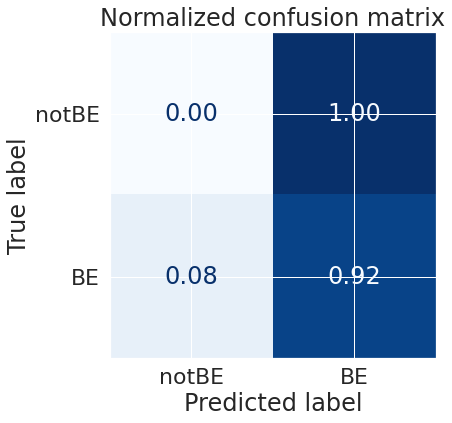

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() 
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device), 
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns   
    return {"loss": loss.cpu().numpy(), 
            "predicted_label": pred_label.cpu().numpy()}

Using the `map()` method once more, we can apply this function to get the losses for all the samples:

In [ ]:
#hide_output
# Convert our dataset back to PyTorch tensors
reviews_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
reviews_encoded["validation"] = reviews_encoded["test"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/6 [00:00<?, ?ba/s]

Finally, we create a `DataFrame` with the texts, losses, and predicted/true labels:

In [ ]:
reviews_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = reviews_encoded["validation"][:][cols]
'''df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))'''

'df_test["label"] = df_test["label"].apply(label_int2str)\ndf_test["predicted_label"] = (df_test["predicted_label"]\n                              .apply(label_int2str))'

In [ ]:
#hide_output
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
79,"Bonjour, je n’ai pas eu le choix de mettre une...",0,1,2.467593
74,"Et bien voilà, j’ai acheté du jus de pomme ext...",0,1,2.428483
73,Magasin à fuir ! Personnel insultant et hautai...,0,1,2.385586
9,Je fais souvent mes courses à carrefour car le...,0,1,2.213500
41,Une catastrophe. Comme ils y a une multitude d...,0,1,2.004528
66,"Achetée début octobre, la carte graphique a ét...",0,1,1.976637
59,Délais non respecter\nSav qui n'apporte aucune...,0,1,1.928484
5,J'ai acheté une tarte chèvre/épinard marque ca...,0,1,1.851186
80,J'ai commandé mes courses en livraison sur sit...,0,1,1.767252
53,Ce n'est pas encore les soldes mais pour une f...,0,1,1.750781


In [ ]:
#hide_output
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
44,"Cliente depuis plus de 20 ans, mardi je vais à...",1,1,0.092022
26,INCOMPÉTENTS !!!\nJ’ai commandé des fourniture...,1,1,0.103096
89,J'ai commandé pour la première fois sur Carref...,1,1,0.104879
86,Pour réserver un article TEFAL non disponible ...,1,1,0.119164
48,Avis laissé ici le 29 décembre et toujours san...,1,1,0.131346
57,Je passe commande sur le site et quand je reço...,1,1,0.131576
32,Carrefour Grand Var : cela fait quelques moi q...,1,1,0.139808
13,Le drive de carrefour Vitrolles est beaucoup ...,1,1,0.146377
45,"Arrêtez de vous enflammer, c'est le mot de pas...",1,1,0.148334
63,Distanciation inexistante au carrefour part di...,1,1,0.149231



The NLP community benefits greatly from sharing pretrained and fine-tuned models, and everybody can share their models with others via the Hugging Face Hub. Any community-generated model can be downloaded from the Hub just like we downloaded the DistilBERT model. With the `Trainer` API, saving and sharing a model is simple:

In [ ]:
#hide_output
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 32.0k/255M [00:00<?, ?B/s]

Upload file runs/Feb24_09-43-17_89ac815e201a/events.out.tfevents.1677232216.89ac815e201a.196.0: 100%|#########…

Upload file runs/Feb24_09-52-53_89ac815e201a/1677232383.0247188/events.out.tfevents.1677232383.89ac815e201a.19…

Upload file training_args.bin: 100%|##########| 2.93k/2.93k [00:00<?, ?B/s]

Upload file runs/Feb24_09-43-17_89ac815e201a/1677232216.9307497/events.out.tfevents.1677232216.89ac815e201a.19…

Upload file runs/Feb24_09-52-53_89ac815e201a/events.out.tfevents.1677232383.89ac815e201a.196.2: 100%|#########…

remote: Scanning LFS files for validity...        
remote: LFS file scan complete.        
To https://huggingface.co/insaf/distilbert-base-uncased-finetuned-reviews
   91689e7..5b76124  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/insaf/distilbert-base-uncased-finetuned-reviews
   91689e7..5b76124  main -> main

To https://huggingface.co/insaf/distilbert-base-uncased-finetuned-reviews
   5b76124..e99c444  main -> main

   5b76124..e99c444  main -> main



'https://huggingface.co/insaf/distilbert-base-uncased-finetuned-reviews/commit/5b761241e30ad1f7397451653c87647f4463940e'

Then let's test the pipeline with a sample review:

In [ ]:
#hide_output
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = model_name
classifier = pipeline("text-classification", model=model_id)

We want to classify the following review:

In [ ]:
df_test['text'][0]

'Bonjour,\nMoi aussi pareil impossible de créer un compte et de les appeler bizarre ...\nTrès déçu de l opération carrefour 😞 surtout que pour avoir une vignette on doit avoir dépensé 10 euros que pour une vignette et au bout du compte on a pas l article attendu'

In [ ]:
custom_review = df_test['text'][0]
custom_preds = classifier(custom_review, return_all_scores=True)

In [ ]:
custom_preds

[[{'label': 'LABEL_0', 'score': 0.14205887913703918},
  {'label': 'LABEL_1', 'score': 0.8579411506652832}]]

Finally, we can plot the probability for each class in a bar plot. Clearly, the model estimates that the most likely class is `joy`, which appears to be reasonable given the tweet:

In [ ]:
custom_preds[0]

[{'label': 'LABEL_0', 'score': 0.14205887913703918},
 {'label': 'LABEL_1', 'score': 0.8579411506652832}]

In [ ]:
reviews

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 182
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 90
    })
})

In [ ]:
plt.figure(figsize=(18, 5))
preds_df = pd.DataFrame(custom_preds[0])
labels = ['Buying experience', 'not buying experience']
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_review}"')
plt.ylabel("Class probability (%)")
plt.show()

Our model classifies everything, or almost everything as positive class. We will see in the next codes/tutorials how to fix that.